## Preprocessing

In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [35]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [36]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [37]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()

application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [38]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_counts[application_counts < 200].index.tolist()
application_types_to_replace

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [39]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()

classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [40]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [41]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [42]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [43]:
# Take a look at the new dataframe:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns = ["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [45]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model

### Attempt 1: This model will have more units per layer and more epochs to train on:

In [46]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()

# Add the first layer
nn_model.add(tf.keras.layers.Dense(units=10, input_dim=43, activation="relu"))

#Add the second dense layer:
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                440       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.6014 - accuracy: 0.6957
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5627 - accuracy: 0.7233
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7258
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7279
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7296
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7292
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5507 - accuracy: 0.7301
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5506 - accuracy: 0.7294
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7303
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accura

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5563 - accuracy: 0.7291 - 301ms/epoch - 1ms/step
Loss: 0.5562983751296997, Accuracy: 0.7290962338447571


Increasing the units per layer, and the number of epochs to train on did not improve the accuracy (72.91% accuracy).

### Attempt 2: Add two more dense layers, with ten units per layer and same number of epochs as attempt 1

In [50]:
# Define the deep learning model
nn_model_2 = tf.keras.models.Sequential()

# Add the first layer
nn_model_2.add(tf.keras.layers.Dense(units=10, input_dim=43, activation="relu"))

#Add the second dense layer:
nn_model_2.add(tf.keras.layers.Dense(units=10, activation="relu"))

#Add the third dense layer:
nn_model_2.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                440       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
nn_model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Train the model
fit_model_2 = nn_model_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5918 - accuracy: 0.7015
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5599 - accuracy: 0.7266
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7293
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7300
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7307
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5496 - accuracy: 0.7316
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7308
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7315
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accura

In [53]:
# Evaluate the model using the test data
model_2_loss, model_2_accuracy = nn_model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_2_loss}, Accuracy: {model_2_accuracy}")

268/268 - 0s - loss: 0.5568 - accuracy: 0.7300 - 288ms/epoch - 1ms/step
Loss: 0.5568312406539917, Accuracy: 0.7300291657447815


More layers has also not increased the accuracy of the model (73.00% accuracy)

### Attempt 3: More Dense Layers, More neurons per layer

In [54]:
# Define the deep learning model
nn_model_3 = tf.keras.models.Sequential()

# Add the first layer
nn_model_3.add(tf.keras.layers.Dense(units=50, input_dim=43, activation="relu"))

#Add the second dense layer:
nn_model_3.add(tf.keras.layers.Dense(units=50, activation="relu"))

#Add the third dense layer:
nn_model_3.add(tf.keras.layers.Dense(units=50, activation="relu"))

#Add the fourth dense layer:
nn_model_3.add(tf.keras.layers.Dense(units=50, activation="relu"))

#Add the fifth dense layer:
nn_model_3.add(tf.keras.layers.Dense(units=50, activation="relu"))

#Add the sixth dense layer:
nn_model_3.add(tf.keras.layers.Dense(units=50, activation="relu"))

# Output layer
nn_model_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_3.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 50)                2200      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 50)                2550      
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 50)                2550      
                                                                 
 dense_27 (Dense)            (None, 1)                

In [55]:
# Compile the model
nn_model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Train the model
fit_model_3 = nn_model_3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5698 - accuracy: 0.7220
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7304
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7300
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5485 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7334
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7343
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7336
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5456 - accura

In [57]:
# Evaluate the model using the test data
model_3_loss, model_3_accuracy = nn_model_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_3_loss}, Accuracy: {model_3_accuracy}")

268/268 - 0s - loss: 0.5768 - accuracy: 0.7301 - 346ms/epoch - 1ms/step
Loss: 0.5767611265182495, Accuracy: 0.7301457524299622


Still no improvement for model three (73.01% accuracy)

In [63]:
# Export our model to HDF5 file

from tensorflow.keras.models import save_model
save_model(nn_model_3, "optimized_model.h5")

# Code taken from Machine Learning Mastery (https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

In [64]:
from google.colab import files
files.download("/content/optimized_model.h5")

# Code taken from StackOverflow (https://stackoverflow.com/questions/50447222/google-colaboratory-keras-save-model-in-hdf5-file-format-and-download-it-to-l)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

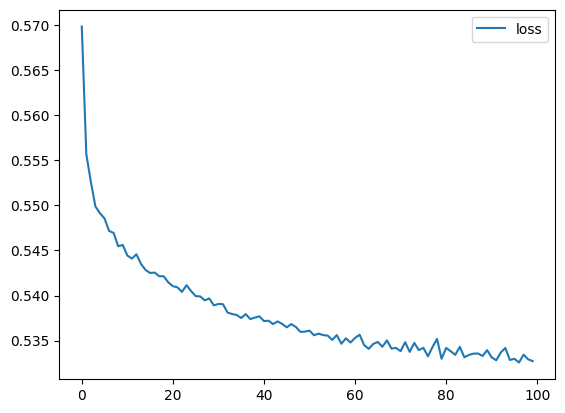

In [65]:
#Converting the model info into a dataframe for plotting
history_df = pd.DataFrame(fit_model_3.history)

#Plotting the loss over the 100 epochs
loss_plot = history_df.plot(y = "loss")

#Saving the plot
loss_plot.figure.savefig("optimized_loss_plot.png")

#Downloading the plot
files.download('optimized_loss_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

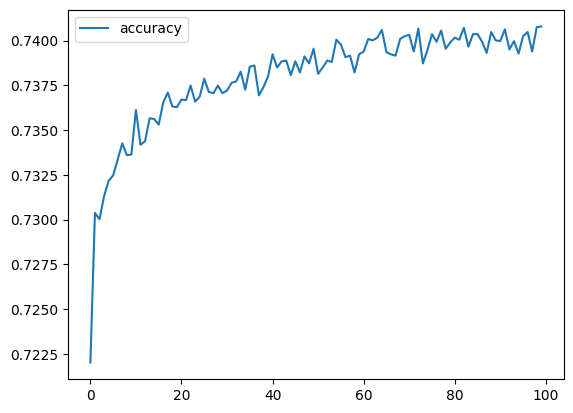

In [66]:
#Plotting the accuracy over the epochs
accuracy_plot = history_df.plot(y = "accuracy")

#Saving the plot
accuracy_plot.figure.savefig("optimized_accuracy_plot.png")

#Downloading the plot
files.download('optimized_accuracy_plot.png')